In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/election_results_2024.csv')
data.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [ ]:
partyMargin = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

data['Margin'] = pd.to_numeric(data['Margin'], errors='coerce')

highMargin = data.loc[data['Margin'].idxmax()]
lowMargin = data.loc[data['Margin'].idxmin()]
seatCount = data['Leading Party'].value_counts()

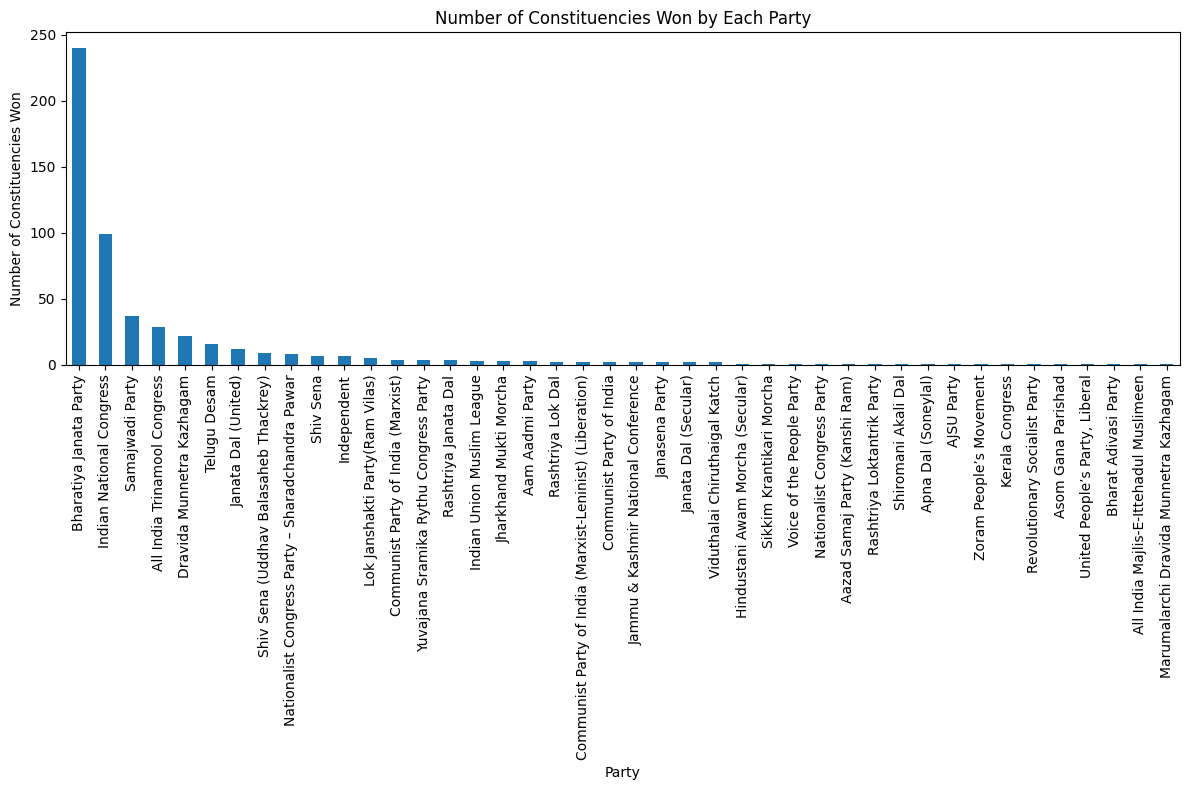

In [ ]:
plt.figure(figsize=(12, 8))
seatCount.plot(kind='bar')
plt.title('Number of Constituencies Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Number of Constituencies Won')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-7-696e48d71b82>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seatCount.index, y=seatCount.values, palette='coolwarm', edgecolor='k')


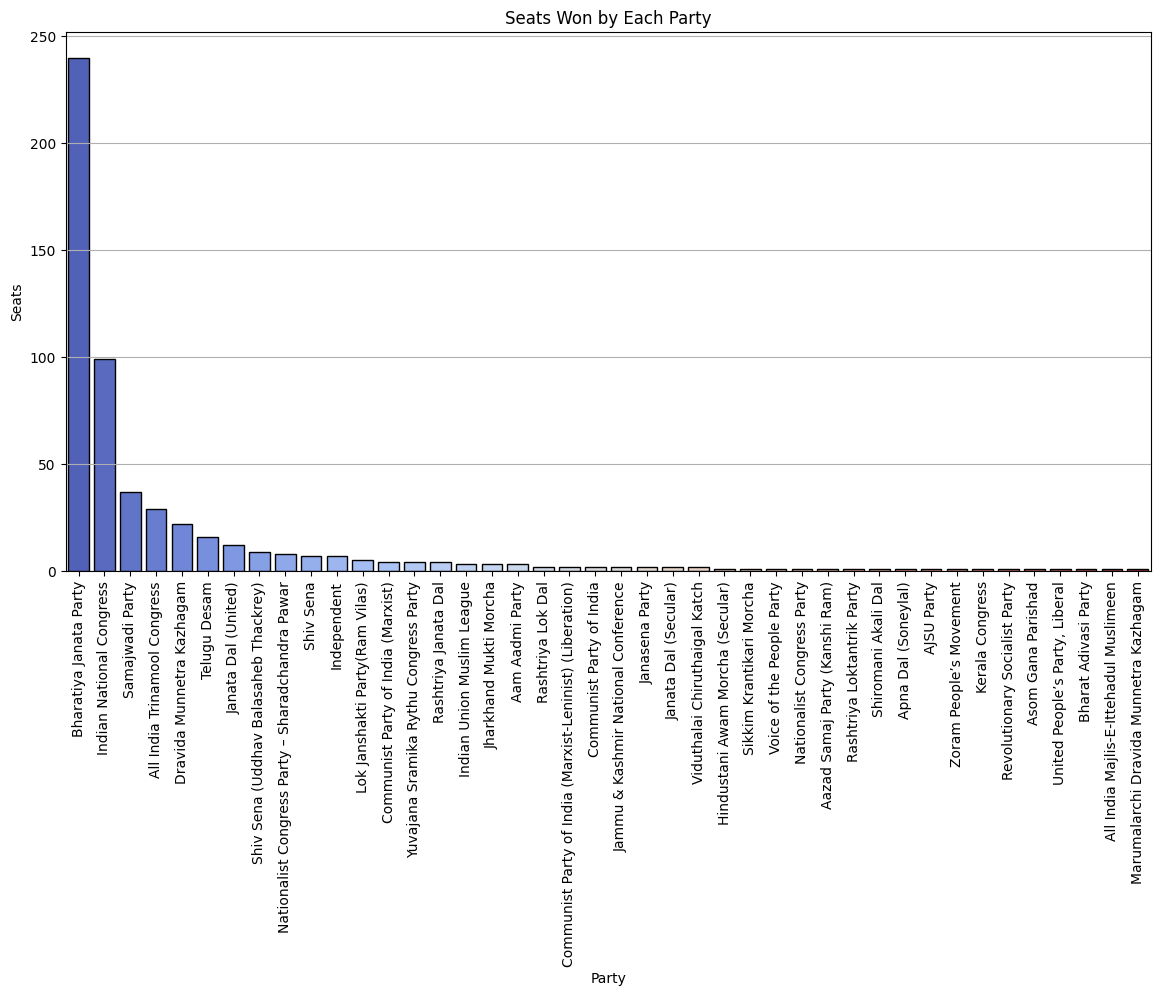

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(x=seatCount.index, y=seatCount.values, palette='coolwarm', edgecolor='k')
plt.title('Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Seats')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

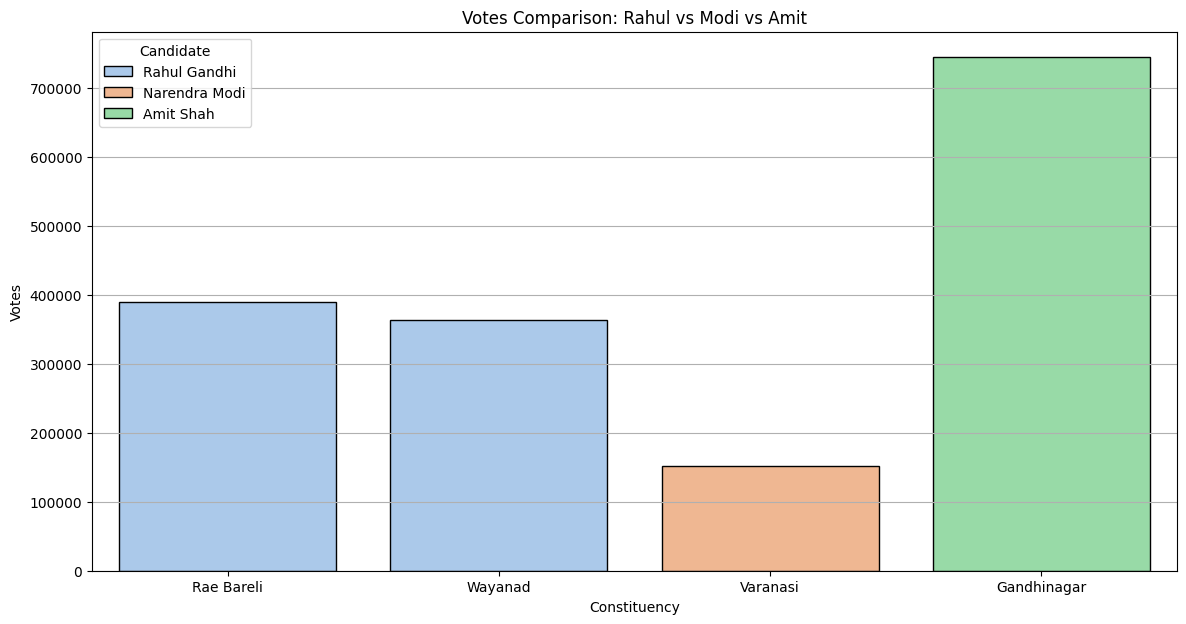

In [ ]:
rahulData = data[data['Leading Candidate'] == 'RAHUL GANDHI']
modiData = data[data['Leading Candidate'] == 'NARENDRA MODI']
amitData = data[data['Leading Candidate'] == 'AMIT SHAH']

rahulVotes = rahulData['Margin'].values
modiVotes = modiData['Margin'].values[0] if not modiData.empty else 0
amitVotes = amitData['Margin'].values[0] if not amitData.empty else 0

rahulCons = list(rahulData['Constituency'])
modiCons = modiData['Constituency'].values[0] if not modiData.empty else "Modi's Cons."
amitCons = amitData['Constituency'].values[0] if not amitData.empty else "Amit's Cons."

compData = pd.DataFrame({
    'Candidate': ['Rahul Gandhi'] * len(rahulVotes) + ['Narendra Modi', 'Amit Shah'],
    'Constituency': rahulCons + [modiCons, amitCons],
    'Votes': list(rahulVotes) + [modiVotes, amitVotes]
})

plt.figure(figsize=(14, 7))
sns.barplot(data=compData, x='Constituency', y='Votes', hue='Candidate', palette='pastel', edgecolor='k')
plt.title('Votes Comparison: Rahul vs Modi vs Amit')
plt.xlabel('Constituency')
plt.ylabel('Votes')
plt.grid(axis='y')
plt.show()

In [ ]:
import pandas as pd
nda_parties = [
    'Bharatiya Janata Party', 'Shiv Sena', 'Lok Janshakti Party(Ram Vilas)',
    'Apna Dal (Soneylal)', 'AJSU Party', 'Asom Gana Parishad',
    'Hindustani Awam Morcha (Secular)', 'Nationalist Congress Party – Sharadchandra Pawar',
    'Telugu Desam'
]

indi_parties = [
    'Indian National Congress', 'Samajwadi Party', 'All India Trinamool Congress',
    'Dravida Munnetra Kazhagam', 'Communist Party of India (Marxist)',
    'Yuvajana Sramika Rythu Congress Party', 'Rashtriya Janata Dal',
    'Indian Union Muslim League', 'Jharkhand Mukti Morcha', 'Aam Aadmi Party',
    'Rashtriya Lok Dal', 'Communist Party of India (Marxist-Leninist) (Liberation)',
    'Communist Party of India', 'Jammu & Kashmir National Conference', 'Janasena Party',
    'Janata Dal (Secular)', 'Viduthalai Chiruthaigal Katchi', 'Voice of the People Party',
    'Aazad Samaj Party (Kanshi Ram)', 'Rashtriya Loktantrik Party', 'Shiromani Akali Dal',
    'Zoram People’s Movement', 'Kerala Congress', 'Revolutionary Socialist Party',
    'United People’s Party, Liberal', 'All India Majlis-E-Ittehadul Muslimeen',
    'Marumalarchi Dravida Munnetra Kazhagam'
]

nda_df = data[data['Leading Party'].isin(nda_parties)]
indi_df = data[data['Leading Party'].isin(indi_parties)]

nda_df.head(), indi_df.head()

(     Constituency  Const. No.              Leading Candidate  \
 0           AJMER          13            BHAGIRATH CHOUDHARY   
 1           ALWAR           8                BHUPENDER YADAV   
 6        Adilabad           1                   GODAM NAGESH   
 7            Agra          18          PROF S P SINGH BAGHEL   
 8  Ahmedabad East           7  HASMUKHBHAI PATEL (H.S.PATEL)   
 
             Leading Party            Trailing Candidate  \
 0  Bharatiya Janata Party          RAMCHANDRA CHOUDHARY   
 1  Bharatiya Janata Party                   LALIT YADAV   
 6  Bharatiya Janata Party                 ATHRAM SUGUNA   
 7  Bharatiya Janata Party           SURESH CHAND KARDAM   
 8  Bharatiya Janata Party  HIMMATSINH PRAHLADSINH PATEL   
 
              Trailing Party    Margin           Status  
 0  Indian National Congress  329991.0  Result Declared  
 1  Indian National Congress   48282.0  Result Declared  
 6  Indian National Congress   90652.0  Result Declared  
 7           S

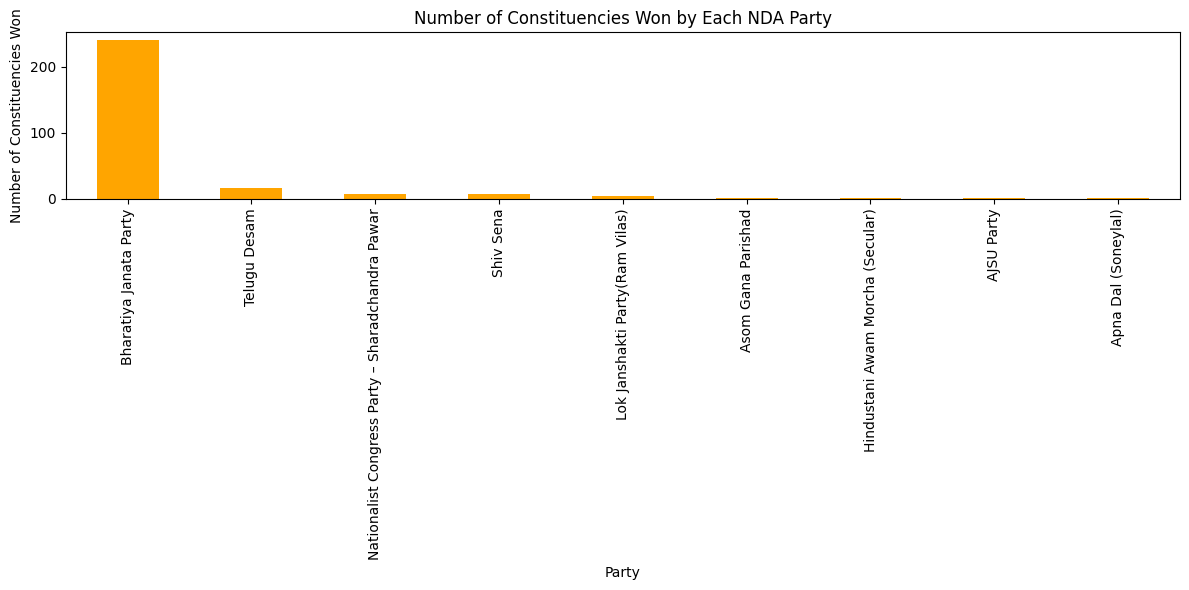

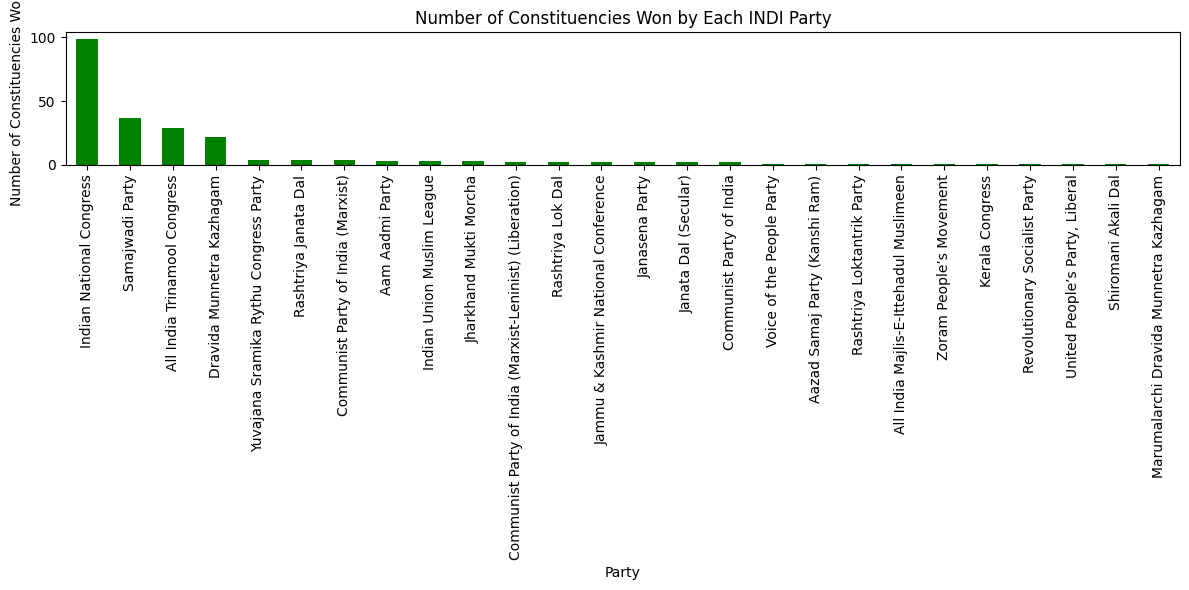

In [ ]:
nda_party_wins = nda_df['Leading Party'].value_counts()
indi_party_wins = indi_df['Leading Party'].value_counts()

plt.figure(figsize=(12, 6))
nda_party_wins.plot(kind='bar', color='orange')
plt.title('Number of Constituencies Won by Each NDA Party')
plt.xlabel('Party')
plt.ylabel('Number of Constituencies Won')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
indi_party_wins.plot(kind='bar', color='green')
plt.title('Number of Constituencies Won by Each INDI Party')
plt.xlabel('Party')
plt.ylabel('Number of Constituencies Won')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

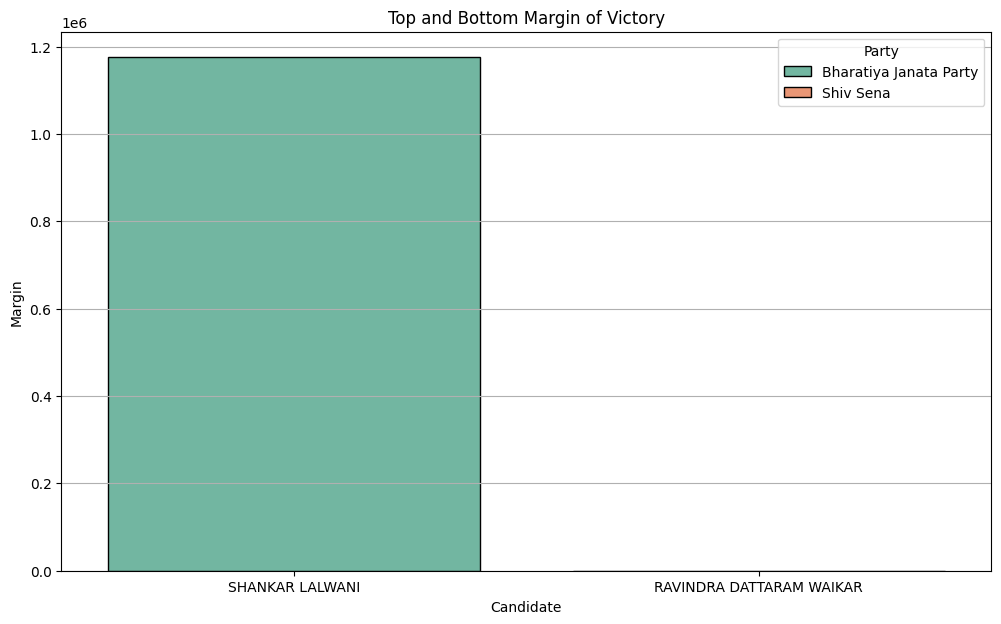

In [ ]:
compDetail = pd.DataFrame({
    'Candidate': [highMargin['Leading Candidate'], lowMargin['Leading Candidate']],
    'Party': [highMargin['Leading Party'], lowMargin['Leading Party']],
    'Margin': [highMargin['Margin'], lowMargin['Margin']]
})

plt.figure(figsize=(12, 7))
sns.barplot(data=compDetail, x='Candidate', y='Margin', hue='Party', palette='Set2', edgecolor='k')
plt.title('Top and Bottom Margin of Victory')
plt.xlabel('Candidate')
plt.ylabel('Margin')
plt.grid(axis='y')
plt.show()

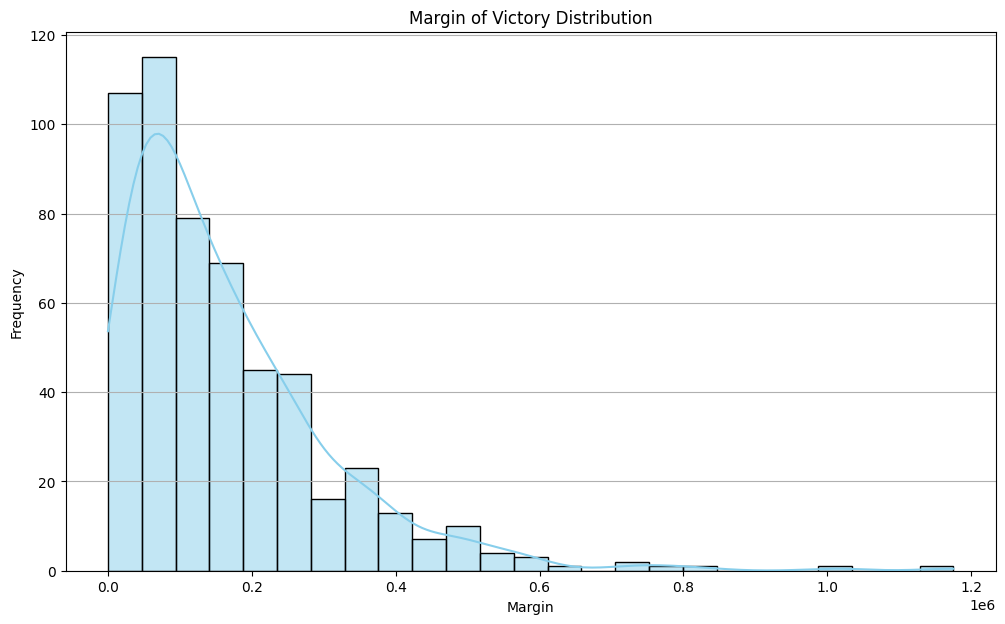

In [ ]:
plt.figure(figsize=(12, 7))
sns.histplot(data['Margin'], bins=25, kde=True, color='skyblue', edgecolor='k')
plt.title('Margin of Victory Distribution')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

<ipython-input-11-98923c5c9813>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Leading Party', y='Margin', palette='viridis', width=0.5)


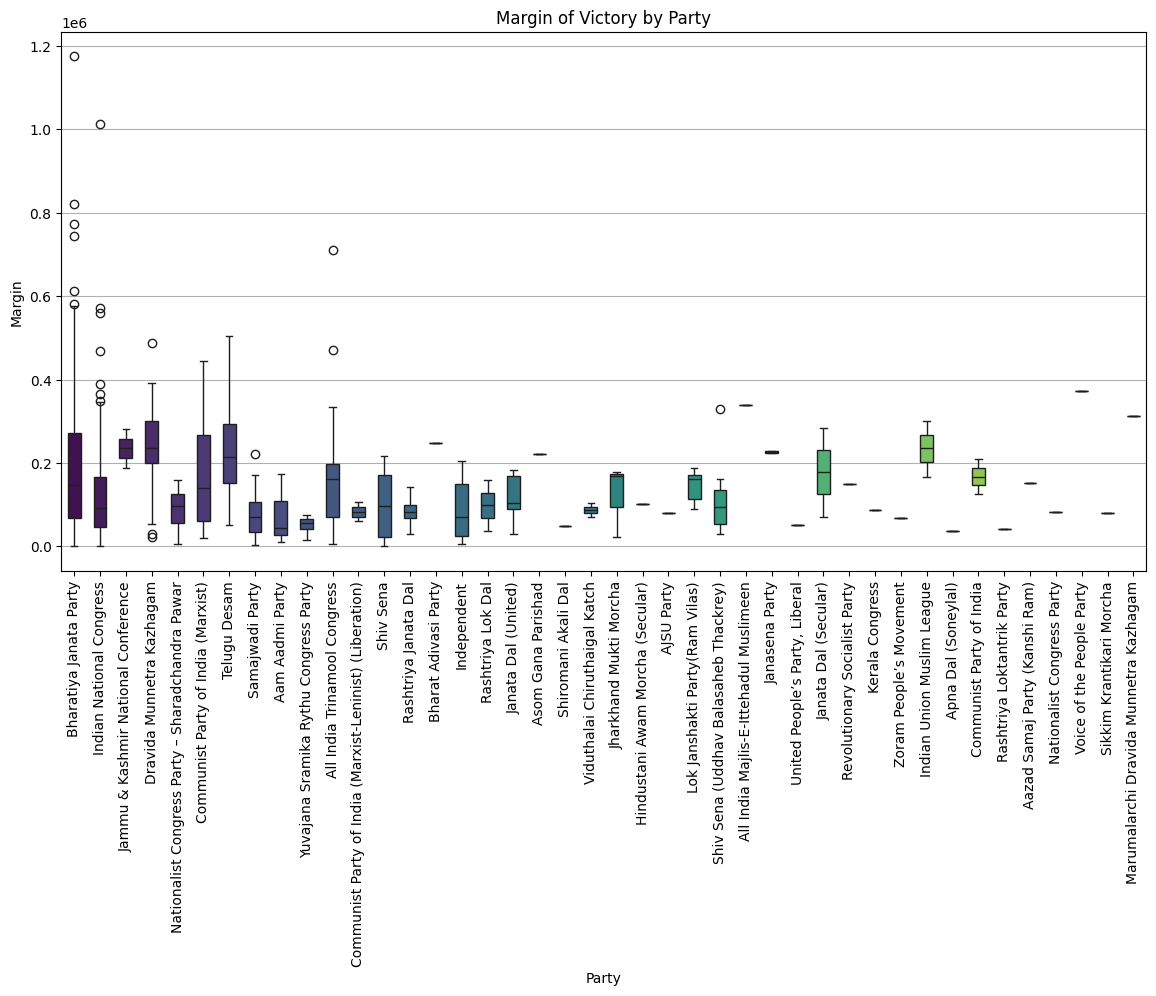

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='Leading Party', y='Margin', palette='viridis', width=0.5)
plt.title('Margin of Victory by Party')
plt.xlabel('Party')
plt.ylabel('Margin')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [ ]:
trailingVotes = data.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)
trailingSeats = data['Trailing Party'].value_counts()

<ipython-input-15-799d76212c4b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trailingVotes.index[:10], y=trailingVotes.values[:10], palette='magma', edgecolor='k')


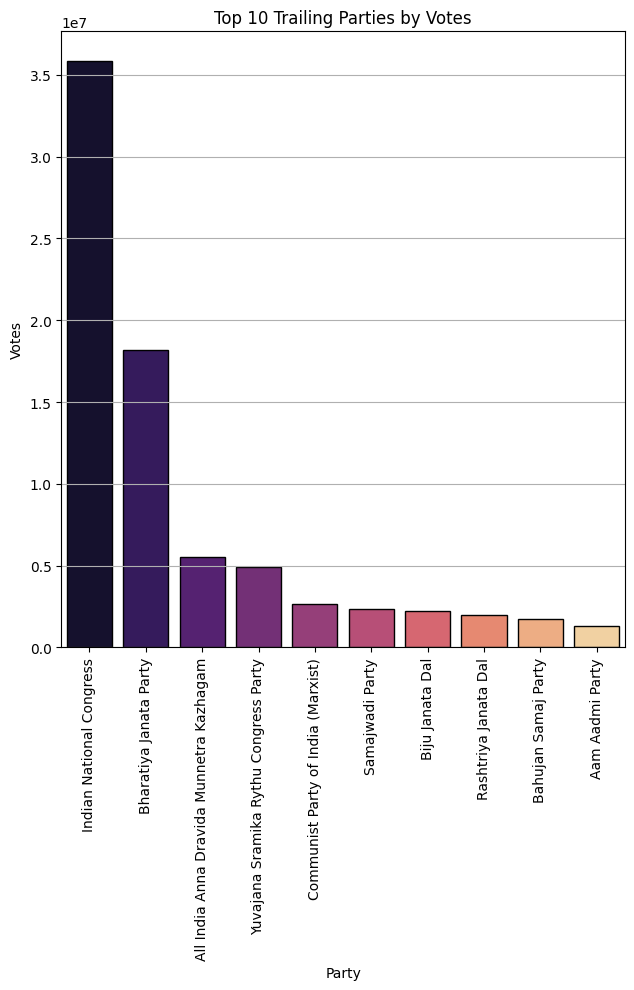

In [ ]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.barplot(x=trailingVotes.index[:10], y=trailingVotes.values[:10], palette='magma', edgecolor='k')
plt.title('Top 10 Trailing Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Votes')
plt.xticks(rotation=90)
plt.grid(axis='y')

<ipython-input-16-aae45d6f7c69>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trailingSeats.index[:10], y=trailingSeats.values[:10], palette='magma', edgecolor='k')


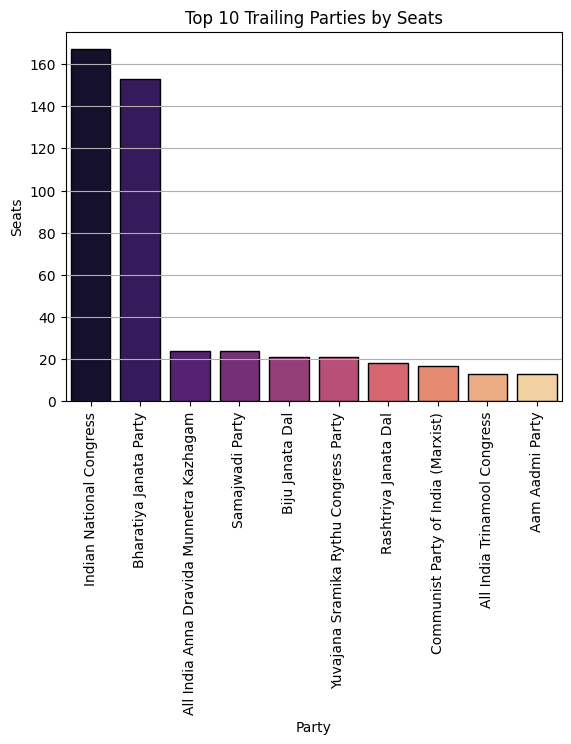

In [ ]:
sns.barplot(x=trailingSeats.index[:10], y=trailingSeats.values[:10], palette='magma', edgecolor='k')
plt.title('Top 10 Trailing Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Seats')
plt.xticks(rotation=90)
plt.grid(axis='y')